In [2]:
import pandas as pd
df=pd.read_csv("Online Sales Data.csv")

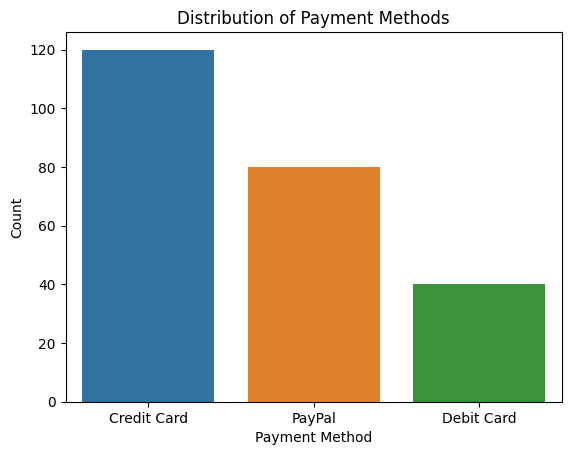

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Payment Method')
plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

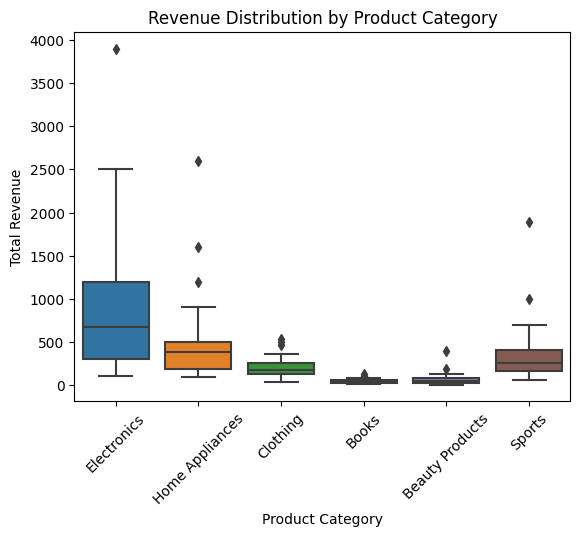

In [8]:
sns.boxplot(data=df, x='Product Category', y='Total Revenue')
plt.xticks(rotation=45)
plt.title("Revenue Distribution by Product Category")
plt.show()


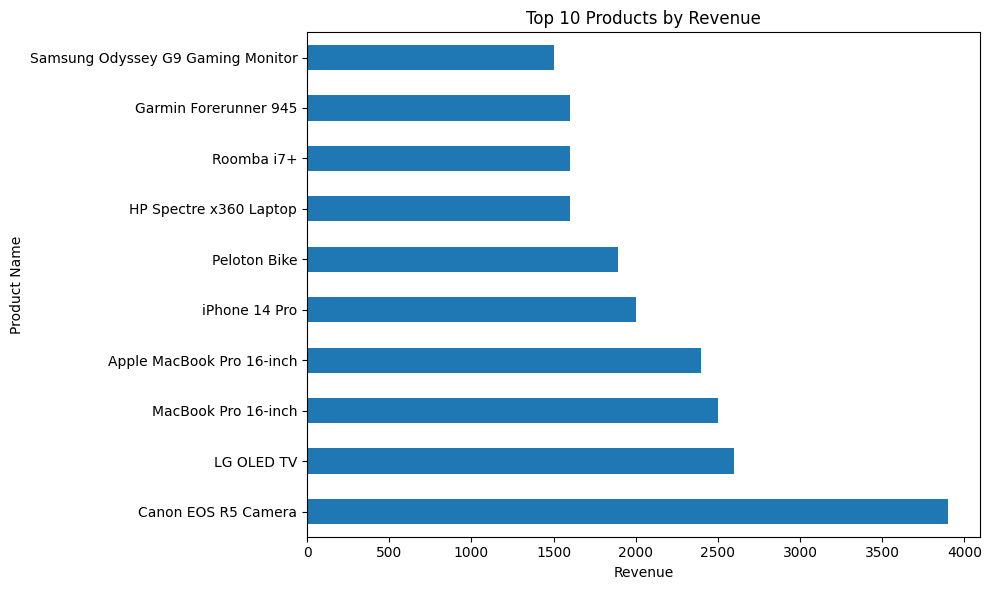

In [9]:
top_products = df.groupby('Product Name')['Total Revenue'].sum().nlargest(10)
top_products.plot(kind='barh', title='Top 10 Products by Revenue', figsize=(10,6))
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


In [10]:
df['Date'] = pd.to_datetime(df['Date'])


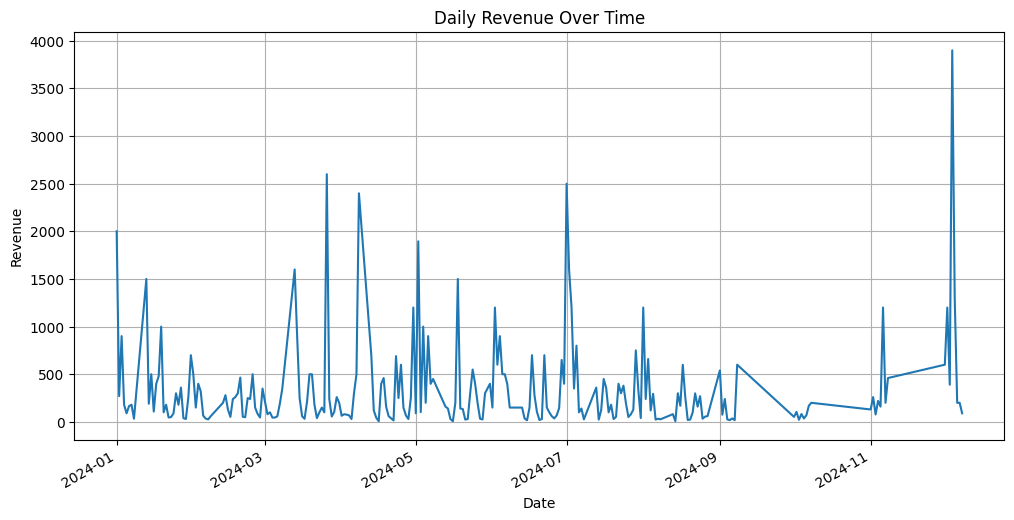

In [11]:
df.groupby('Date')['Total Revenue'].sum().plot(figsize=(12,6), title='Daily Revenue Over Time')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()



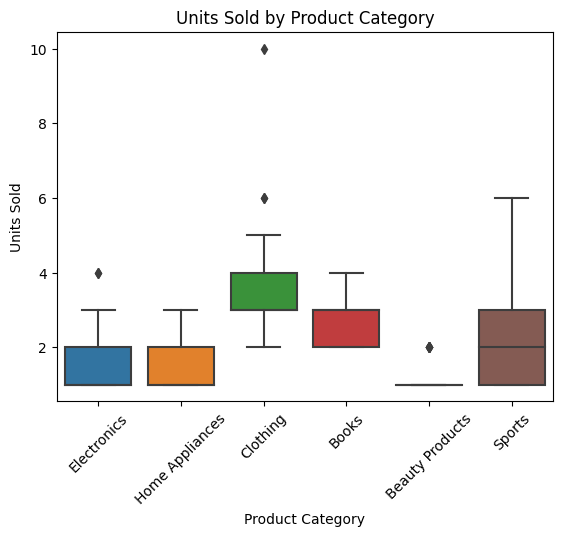

In [12]:
sns.boxplot(data=df, x='Product Category', y='Units Sold')
plt.xticks(rotation=45)
plt.title("Units Sold by Product Category")
plt.show()


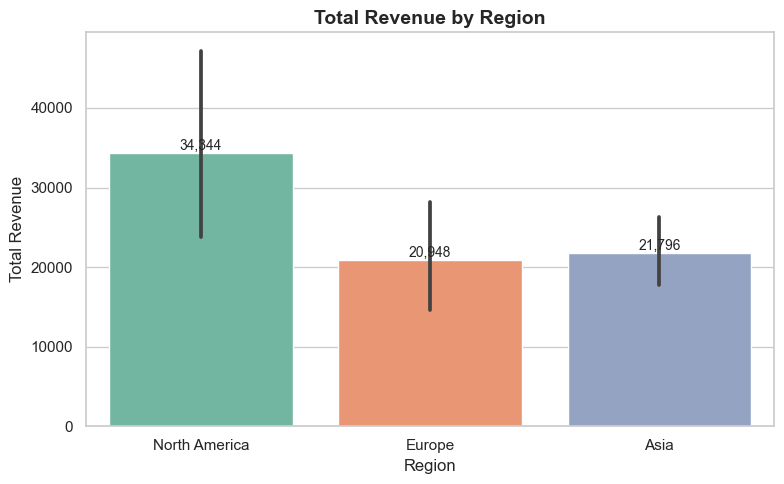

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="Set2")

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x='Region', y='Total Revenue', estimator='sum')
plt.title("Total Revenue by Region", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



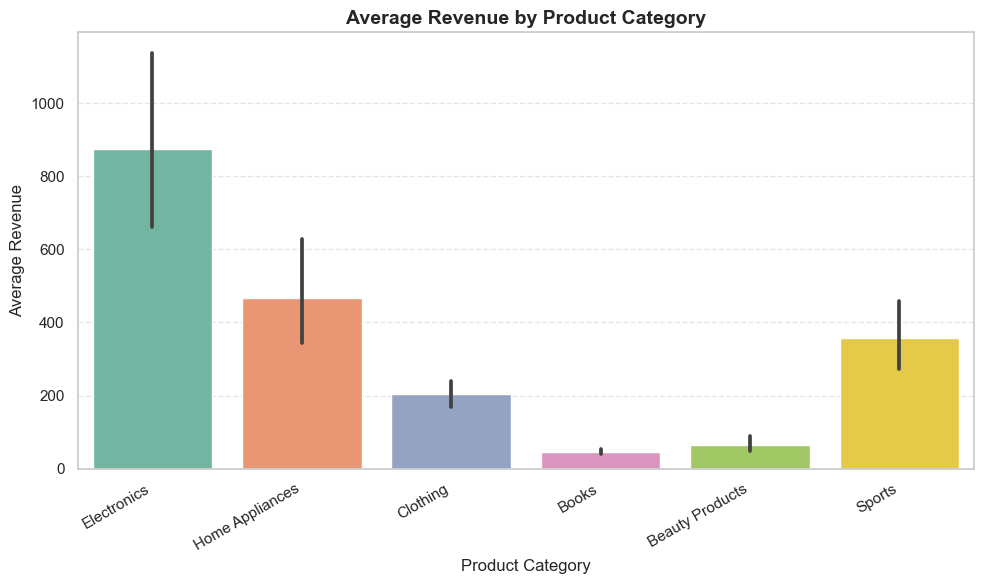

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Product Category', y='Total Revenue', estimator='mean', palette='Set2')
plt.title("Average Revenue by Product Category", fontsize=14, fontweight='bold')
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Online Sales Data.csv")

df = df.dropna()

df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]


In [31]:
print("Any NaN in x:", x.isnull().values.any())
print("Any NaN in y:", y.isnull().values.any())
print("Any inf in x:", np.isinf(x).values.any())
print("Any inf in y:", np.isinf(y).values.any())


Any NaN in x: False
Any NaN in y: False
Any inf in x: False
Any inf in y: False


In [26]:
df = df.dropna()  # Drop rows with any NaN
df = df[~df.isin([float('inf'), float('-inf')]).any(axis=1)]  # Drop rows with inf values


In [30]:
x = df[['Units Sold', 'Unit Price']]
y = df['Total Revenue']


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)



Mean Squared Error: 6567.34


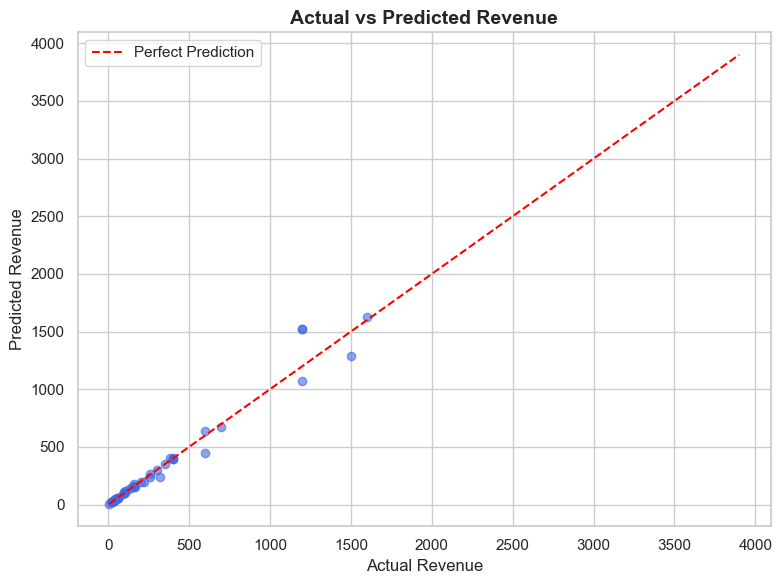

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse, 2))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.title("Actual vs Predicted Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Actual Revenue", fontsize=12)
plt.ylabel("Predicted Revenue", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
# Drop rows with missing Region, Product Category, or Payment Method
df = df.dropna(subset=['Region', 'Product Category', 'Payment Method'])





In [49]:
region_categories = sorted(df['Region'].unique().tolist())
product_categories = sorted(df['Product Category'].unique().tolist())
payment_methods = sorted(df['Payment Method'].unique().tolist())

